### Description of columns
- id: The internal Lichess game id
- rated: If the game was played with rating points on the line
- created_at and last_move_at: The start and end times, respectively, of the game
- turns: The number of turns before the game ended
- victory_status: How the win was achieved; notable ones for our purposes include "mate" (the loser was placed in checkmate), "resign" (the loser resigned), "outoftime" (the loser ran out of - time to make their moves; often referred to as "flagging") and "draw" (users agreed to a draw).
- winner: The winner, by color of pieces (or "draw" if the game was drawn)
- increment code: The amount of time the users played with.It's an amount of time added to the clock after each move is made. In format x + y, x refers to the number of minutes players start with, and y refers to the number of seconds they gain every time they make a move. Common formats include 1 + 0 ("bullet"), 3 + 0 or 5 + 0 ("blitz"), and 10 + something ("rapid")
- hite/black id: The lichess username of the white/black player
- white/black rating: The lichess ELO of the white/black player
- moves: A complete list of moves played in the game, given in algebraic notation) (see here for a more detailed explanation)
- opening_eco: A standardized short code for openings; see list of ecos
- opening_name: The common referrent for the opening name; Openings are referred to by both a general opening name and a variation name after (e.g. Italian Game: Schilling-Kostic Gambit means the Schilling-Kostic Gambit variation of the Italian Game.)
- opening_ply: The number of moves considered to be played in the opening.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('games.csv')
df.head() 

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


### Checking data types

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


### Removing unnecessary columns
* There are a lot of columns that we are not going to use in any manner and there are some columns that we will add in later sections which will help us in categorizing and visualizing data. So, we can safely drop those unnecessary columns. After dropping those columns, we are left with

In [7]:
df = df.drop(['id','created_at', 'last_move_at'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rated           20058 non-null  bool  
 1   turns           20058 non-null  int64 
 2   victory_status  20058 non-null  object
 3   winner          20058 non-null  object
 4   increment_code  20058 non-null  object
 5   white_id        20058 non-null  object
 6   white_rating    20058 non-null  int64 
 7   black_id        20058 non-null  object
 8   black_rating    20058 non-null  int64 
 9   moves           20058 non-null  object
 10  opening_eco     20058 non-null  object
 11  opening_name    20058 non-null  object
 12  opening_ply     20058 non-null  int64 
dtypes: bool(1), int64(4), object(8)
memory usage: 1.9+ MB


* We convert Object data type to Categorical data type

In [8]:
df['victory_status'] = df['victory_status'].astype('category')
df['winner'] = df['winner'].astype('category')
df['increment_code'] = df['increment_code'].astype('category')
df['white_id'] = df['white_id'].astype('category')
df['black_id'] = df['black_id'].astype('category')
df['moves'] = df['moves'].astype('category')
df['opening_eco'] = df['opening_eco'].astype('category')
df['opening_name'] = df['opening_name'].astype('category')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   rated           20058 non-null  bool    
 1   turns           20058 non-null  int64   
 2   victory_status  20058 non-null  category
 3   winner          20058 non-null  category
 4   increment_code  20058 non-null  category
 5   white_id        20058 non-null  category
 6   white_rating    20058 non-null  int64   
 7   black_id        20058 non-null  category
 8   black_rating    20058 non-null  int64   
 9   moves           20058 non-null  category
 10  opening_eco     20058 non-null  category
 11  opening_name    20058 non-null  category
 12  opening_ply     20058 non-null  int64   
dtypes: bool(1), category(8), int64(4)
memory usage: 2.3 MB


#### Data Distribution
* We should check the statistical summary of each column to gain insight into the distribution of data in each column. Statistical measurements can tell you any mathematical problems you may have, such as overly significant values and large deviations.
* It returns results for numeric variables only, not for text data. If we want to see them too, we can add the 'include='all' parameter to the method to see all the variables together, or the 'include=['O']' parameter to see only the text variables.

In [9]:
#df.describe(include='O')
#df.describe(include='all')
df.describe()

,turns,white_rating,black_rating,opening_ply
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


In [10]:
#showing all the unique values in a column.
unique_counts = df.from_records([(col, df[col].nunique()) for col in df.columns],
                                columns = ['Columns_Name','Num_Unique']).sort_values(by=['Num_Unique'])
print(unique_counts)

      Columns_Name  Num_Unique
0            rated           2
3           winner           3
2   victory_status           4
12     opening_ply          23
1            turns         211
10     opening_eco         365
4   increment_code         400
11    opening_name        1477
6     white_rating        1516
8     black_rating        1521
7         black_id        9331
5         white_id        9438
9            moves       18920


- This table highlights a couple of items that will help determine which values should be categorical.

### Check the null values¶
If there are missing values in the Dataset before doing any statistical analysis, we need to handle those missing values.
- MCAR(Missing completely at random): These values do not depend on any other features.
- MAR(Missing at random): These values may be dependent on some other features.
- MNAR(Missing not at random): Missing values depend on the unobserved data.

In [11]:
# Checking the missing values
df.isnull().sum() 
#df.isnull().sum().sort_values(ascending=False) >> Finding the number of missing data in df and sorting in descending order

rated             0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

### Exploratory Analysis & Data Visualization

### Q1. How frequently has each victory status?

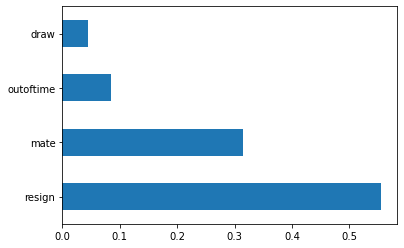

In [12]:
# Let's calculate the percentage of each job status category.
df.victory_status.value_counts(normalize=True)

#plot the bar graph of percentage victory_status categories
df.victory_status.value_counts(normalize=True).plot.barh()
plt.show()


- mate the loser was placed in checkmate
- resign the loser resigned
- outoftime the loser ran out of - time to make their moves; often referred to as "flagging"
- draw users agreed to a draw.

### Q2. How frequently has each color won a match?

In [21]:
white_winner, black_winner, draw_winner = df['winner'].value_counts()

In [23]:
total_winner = df['winner'].value_counts().sum()
print(total_winner)

20058


In [25]:
white_win_percent = (white_winner/total_winner)*100
black_win_percent = (black_winner/total_winner)*100
draw_win_percent = (draw_winner/total_winner)*100

In [27]:

print(f"White has won { round(white_win_percent, 2) } percent of all matches")
print(f"Black has won { round(black_win_percent, 2) } percent of all matches")
print(f"There have been { round(draw_win_percent, 2) } percent draws in all matches")

White has won 49.86 percent of all matches
Black has won 45.4 percent of all matches
There have been 4.74 percent draws in all matches


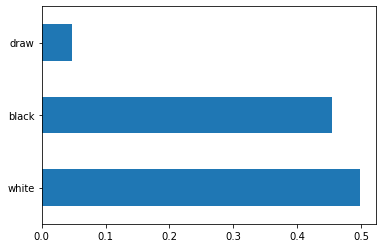

In [13]:
#Winner column distribution
df.winner.value_counts(normalize=True)
df.winner.value_counts(normalize=True).plot.barh()
plt.show()


### Q3. How many rated games were played?

In [28]:
print('The number of rated games were {}.'.format(df[df.rated ==True].shape[0]))

The number of rated games were 16155.


Mean Rating : 1592.73
Max Rating : 2723
Min Rating : 784
Std Rating : 291.16


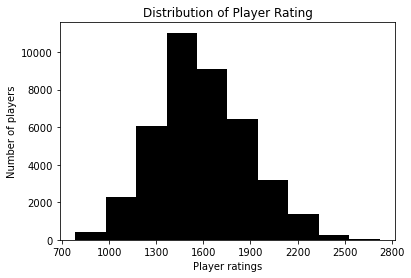

In [29]:
w_rate = df["white_rating"].tolist()
b_rate = df["black_rating"].tolist()
w_rate.extend(b_rate) #Python Concatenating Lists extend()
mean_rating, max_rating, min_rating, std_rating = round(np.mean(w_rate), 2), max(w_rate), min(w_rate), round(np.std(w_rate), 2)

print("Mean Rating :", mean_rating)
print("Max Rating :", max_rating)
print("Min Rating :", min_rating)
print("Std Rating :", std_rating)

plt.hist(w_rate, histtype="bar", rwidth=1, color="black")
plt.title("Distribution of Player Rating")
plt.xlabel("Player ratings")
plt.ylabel("Number of players")
plt.xticks(range(700, 3100, 300))
plt.show()


### Q4. What is the most preferred opening name?¶


In [43]:
df['opening_name'].value_counts()

Van't Kruijs Opening                                                                  368
Sicilian Defense                                                                      358
Sicilian Defense: Bowdler Attack                                                      296
Scotch Game                                                                           271
French Defense: Knight Variation                                                      271
                                                                                     ... 
Queen's Gambit Accepted: Bogoljubov Defense                                             1
Queen's Gambit Accepted: Central Variation |  Rubinstein Defense                        1
Queen's Gambit Accepted: Central Variation |  Rubinstein Defense |  Yefimov Gambit      1
Queen's Gambit Accepted: Deferred Variation                                             1
Zukertort Opening: Wade Defense                                                         1
Name: open

In [71]:
most_choice = df['opening_name'].value_counts().head(10)

In [78]:
#chess opening names are too long so we will shorten them
def shorten_names(opening):
    if ':' in opening:
        opening = opening.split(':')[0]
    while '|' in opening:
        opening = opening.split('|')[0]
    if '#' in opening:
        opening = opening.split('#')[0]
    if 'Accepted' in opening:
        opening = opening.replace('Accepted', '')
    if 'Declined' in opening:
        opening = opening.replace('Declined', '')
    if 'Refused' in opening:
        opening = opening.replace('Refused', '')
    return opening.strip()
df['opening_name_s'] = df.opening_name.apply(shorten_names)

Text(0, 0.5, 'Number of Games')

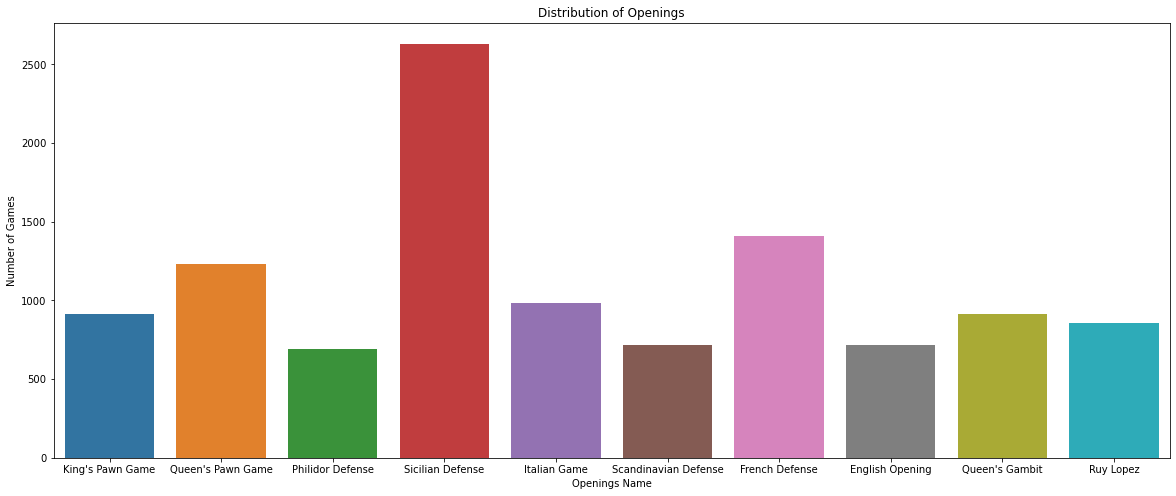

In [79]:
plt.subplots(figsize=(20,8))
plt.title("Distribution of Openings")
counts1 = df['opening_name_s'].value_counts()
Data1 = df.loc[df['opening_name_s'].isin(counts1.index[counts1>600])]
sns.countplot(Data1.main_openings)
plt.xlabel('Openings Name')
plt.ylabel('Number of Games')


#### opening_ply: The number of moves considered to be played in the opening

In [38]:
highest_opening_play = df['opening_ply'].sort_values(ascending=False).max()
print(highest_opening_play)


28


In [37]:
highest_opening_count = df[df['opening_ply']==highest_opening_play]['opening_ply'].value_counts().max()
print(highest_opening_count)


4


In [35]:
print(f"{highest_opening_play} is maximum number of moves in an opening move. There are {highest_opening_count} opening plays with {highest_opening_play} moves.")


28 is maximum number of moves in an opening move. There are 4 opening plays with 28 moves.
